This paper mainly introduces the use of **electroinc** script, which uses **pymatgen** to read and process the calculation results of DOS and COHP.
- **DOS_Process**: Read DOS information from an vasprun.xml file
- **Lobster_PProcess**: Read and process COHP results  

All energy information is subtracted from Fermi level by default

In [1]:
from Jworkflow.electronic import DOS_Process, Lobster_PProcess
from Jworkflow.plot import gradient_graphics
import matplotlib.pyplot as plt
import numpy as np

# DOS_Process
First read a **vasprun.xml** file containing the results of the DOS.

In [2]:
DP=DOS_Process()
DP.read_xml('example/electronic/vasprun.xml')

You can use built-in functions to calculate the D-band properties of individual atoms, like

In [3]:
DP.D_band_center(0)

-0.64

In [4]:
DP.D_band_width(0)

3.82

Or simply call **pymatgen** to compute multiple D-band properties for a series of atoms.

In [5]:
DP.all_band_properities([0,1])

{'band center': -0.6387634758450015,
 'band width': 3.8142777447668865,
 'band kurtosis': 9.300256967437907,
 'band skewness': 1.0580331467207027,
 'band filling': 0.6261710491143083,
 'upper band edge': 1.8522390700000013}

When dealing with spin polarization density of states, the built-in function handles different spin states separately, while calling pymatgen handles them together, or you can use **spin** parameter in **all_band_properities** to choose a spin channel for calculation.

**get_E_DOS** is used to read energies and DOS of the corresponding atom for plotting purposes.

(-10.0, 10.0)

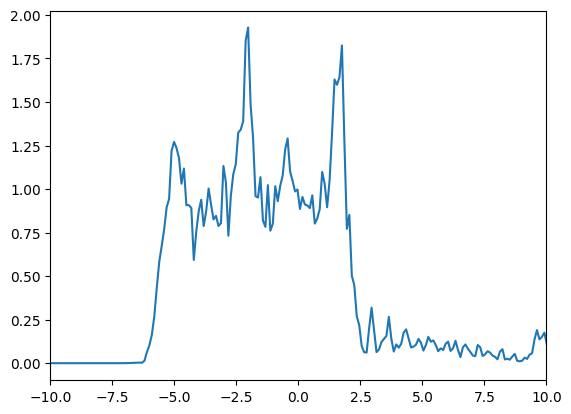

In [6]:
E, DOS = DP.get_E_DOS(0)

plt.plot(E, DOS[0])
ax=plt.gca()
ax.set_xlim([-10,10])

You can use **gradient_graphics** to color the DOS

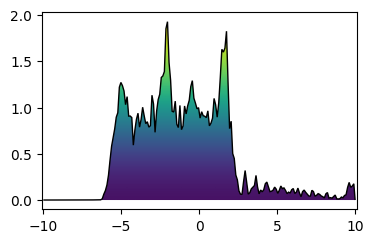

In [7]:
x = []; y = []
for i, e in enumerate(E):
    if e > -10 and e < 10:
        x.append(E[i])
        y.append(DOS[0][i])
x.append(10); y.append(0)

fig = plt.figure(figsize=(8 / 2.54, 5 / 2.54))
ax = fig.figure.add_axes([0, 0, 1, 1])
gradient_graphics(ax, x, y)

# Lobster_PProcess
This class reads **LOBSTER** results, including **COHPCAR.lobster**， **COOPCAR.lobster** and **DOSCAR.lobster**. Enter these files and the corresponding structure.

In [8]:
LP=Lobster_PProcess()
LP.read_car('example/electronic/COHPCAR.lobster', 'example/electronic/Ru2HfIn_N2h_0_1c.vasp')

Use **show_bonds** to query the current COHP calculation for which atomic pair interactions are included, and then use **get_coxp** to get the COHP data for the corresponding atomic pair. Note that when dealing with COHP and COOP related data, the index starts at 1.

In [9]:
LP.show_bonds()

 1     44Ru-66N
 2     10Hf-66N
 3      65N-66N


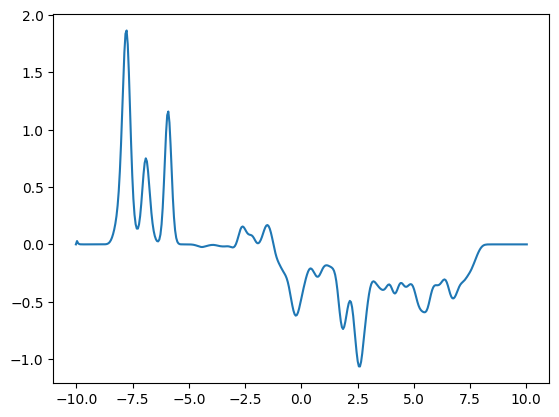

In [10]:
cohp=LP.get_coxp(1)

plt.plot(cohp['energies'], -1 * np.array(cohp['COHP']['1']))

the **ICOHP** of specified bond can be queried by

In [11]:
LP.get_icohp(1)

-3.20104

You can also read the state density file calculated by **LOBSTER** and plot DOS. You should first read **COHPCAR.lobster** and then read **DOSCAR.lobster**. And, for now, this script can not calculate d band properties from this DOS data. 

In [12]:
LP.read_car('example/electronic/DOSCAR.lobster', 'example/electronic/Ru2HfIn_N2h_0_1c.vasp', 'dos')

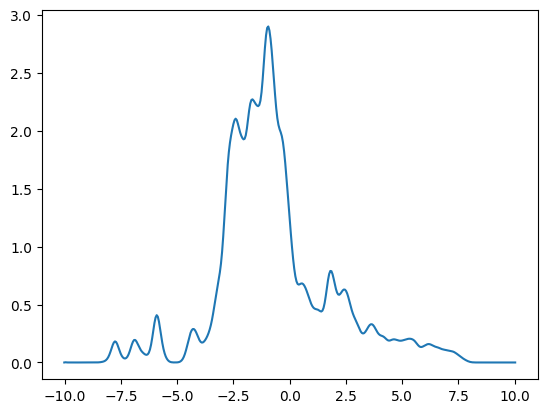

In [13]:
dos=LP.get_dos(43, 'd')

plt.plot(dos['energies'], dos['dos'])